In [1]:
from executables.common.header import *

Welcome to JupyROOT 6.22/02


In [2]:
CF18 = pandas.DataFrame(RDF("DecayTree", f"common/ntuples/Bc2D0MuNuX_CF_sw.root").AsNumpy())
DCS18 = pandas.DataFrame(RDF("DecayTree", f"common/ntuples/Bc2D0MuNuX_DCS_sw.root").AsNumpy())
MISID18 = pandas.DataFrame(RDF("DecayTree", f"common/ntuples/Bc2D0MuNuX_MISID_sw.root").AsNumpy())
COMB18 = pandas.DataFrame(RDF("DecayTree", f"common/ntuples/Bc2D0MuNuX_COMB_sw.root").AsNumpy())

mc_sel = "B_plus_M>3500 && (D0_M>=1790 && D0_M<=1940) && (B_plus_FIT_LTIME>=0.0003 && B_plus_FIT_LTIME<=0.002) && (B_plus_MCORR>=4200 && B_plus_MCORR<=7200)"

MC_PATH = "/home/blaise/scratch/ROOTFILES/fit/D0MuNu/MC16"


D0_RDF = RDF("DecayTree", f"{MC_PATH}/Bc2D0MuNu.root").Filter(mc_sel)
D0_RDF_Pperp_added = D0_RDF.Define(f"B_plus_PV_3Vec",           f"gen3Vec(B_plus_OWNPV_X, B_plus_OWNPV_Y, B_plus_OWNPV_Z)") \
                            .Define(f"B_plus_SV_3Vec",   f"gen3Vec(B_plus_SV_X, B_plus_SV_Y, B_plus_SV_Z)") \
                            .Define(f"BflightVector",    f"subtract3Vec( B_plus_SV_3Vec, B_plus_PV_3Vec)") \
                            .Define(f"D0_3momVector",    f"gen3Vec(D0_PX, D0_PY, D0_PZ)") \
                            .Define(f"D0_Pperp_BFV",     f"D0_3momVector.Perp(BflightVector)")
D0_MC16 = pandas.DataFrame(D0_RDF_Pperp_added.AsNumpy())


D0pi0_RDF = RDF("DecayTree", f"{MC_PATH}/Bc2D0pi0MuNu.root").Filter(mc_sel)
D0pi0_RDF_Pperp_added = D0pi0_RDF.Define(f"B_plus_PV_3Vec",           f"gen3Vec(B_plus_OWNPV_X, B_plus_OWNPV_Y, B_plus_OWNPV_Z)") \
                            .Define(f"B_plus_SV_3Vec",   f"gen3Vec(B_plus_SV_X, B_plus_SV_Y, B_plus_SV_Z)") \
                            .Define(f"BflightVector",    f"subtract3Vec( B_plus_SV_3Vec, B_plus_PV_3Vec)") \
                            .Define(f"D0_3momVector",    f"gen3Vec(D0_PX, D0_PY, D0_PZ)") \
                            .Define(f"D0_Pperp_BFV",     f"D0_3momVector.Perp(BflightVector)")
D0pi0_MC16 = pandas.DataFrame(D0pi0_RDF_Pperp_added.AsNumpy())



D0g_RDF = RDF("DecayTree", f"{MC_PATH}/Bc2D0gMuNu.root").Filter(mc_sel)
D0g_RDF_Pperp_added = D0g_RDF.Define(f"B_plus_PV_3Vec",           f"gen3Vec(B_plus_OWNPV_X, B_plus_OWNPV_Y, B_plus_OWNPV_Z)") \
                            .Define(f"B_plus_SV_3Vec",   f"gen3Vec(B_plus_SV_X, B_plus_SV_Y, B_plus_SV_Z)") \
                            .Define(f"BflightVector",    f"subtract3Vec( B_plus_SV_3Vec, B_plus_PV_3Vec)") \
                            .Define(f"D0_3momVector",    f"gen3Vec(D0_PX, D0_PY, D0_PZ)") \
                            .Define(f"D0_Pperp_BFV",     f"D0_3momVector.Perp(BflightVector)")
D0g_MC16 = pandas.DataFrame(D0g_RDF_Pperp_added.AsNumpy())


# # stack & fill D* bhs
Dst_MC16 = pandas.concat([D0pi0_MC16, D0g_MC16])

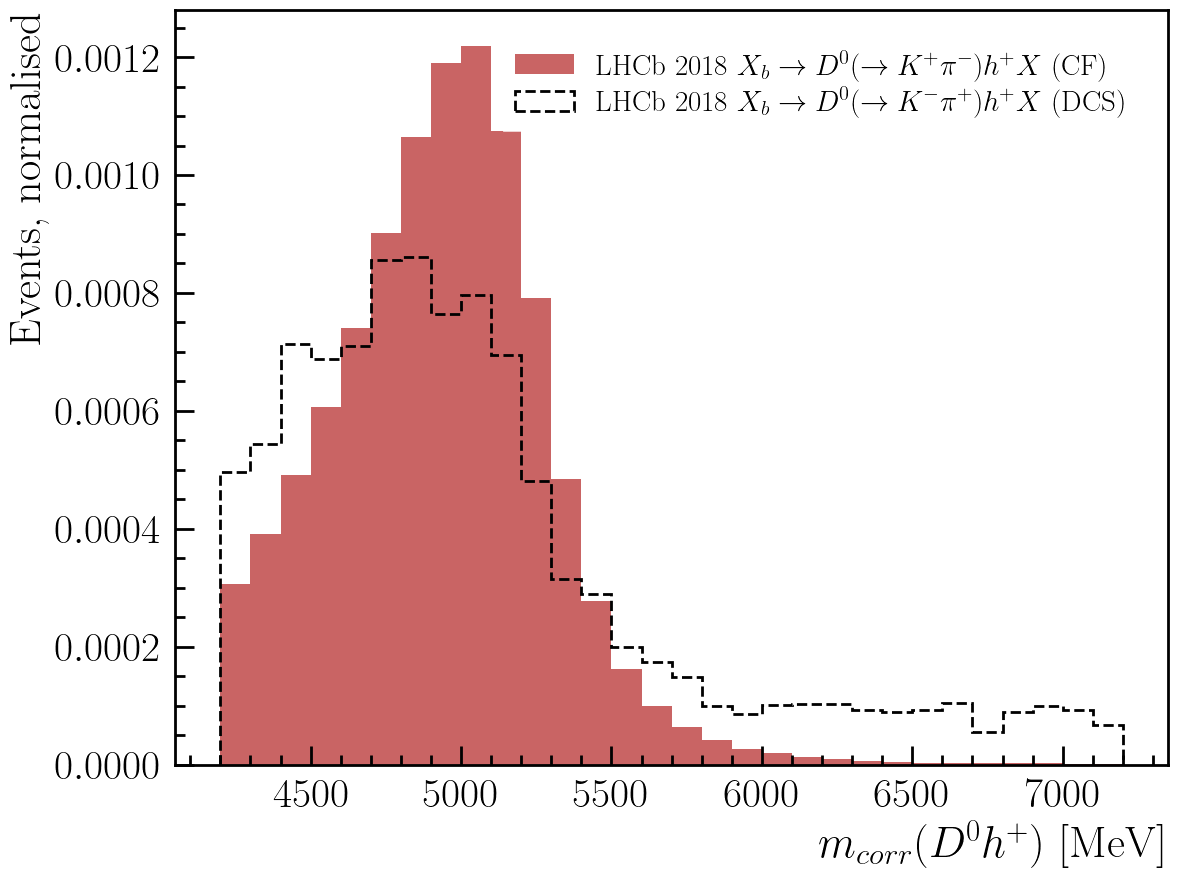

In [58]:
misid_cf = MISID18.query("K_minus_ID*Mu_plus_ID<0")
misid_dcs = MISID18.query("K_minus_ID*Mu_plus_ID>0")

plt.figure()

_ = plt.hist(misid_cf["B_plus_MCORR"], weights=misid_cf["realD0_w"], range=[4200, 7200], bins=30, density=True, alpha=.7, color="firebrick", histtype="stepfilled", label=r"LHCb 2018 $X_b \rightarrow D^{0}(\rightarrow K^{+}\pi^{-}) h^{+} X$ (CF)")
_ = plt.hist(misid_dcs["B_plus_MCORR"], weights=misid_dcs["realD0_w"], range=[4200, 7200], bins=30, density=True, alpha=1., color="black", linestyle="--", histtype="step", lw=2, label=r"LHCb 2018 $X_b \rightarrow D^{0}(\rightarrow K^{-}\pi^{+}) h^{+} X$ (DCS)")

plt.minorticks_on()
plt.tick_params(axis='both', which='major', direction="in")
plt.tick_params(axis='both', which='minor', direction="in")

plt.ylabel("Events, normalised")
plt.xlabel("$m_{corr}(D^{0}h^{+})$   [MeV]")
plt.legend(fontsize=21)
plt.savefig("plots/misc/CF_vs_DCS_misid.pdf")
plt.savefig("plots/misc/CF_vs_DCS_misid.png")

In [25]:
D0_sig = load_bh("D0_MC16").project(0).view()
Dst_sig = load_bh("Dst_MC16").project(0).view()

print("D0 max")
print(load_bh("D0_MC16").axes[0].centers[np.argmax(D0_sig)])
print()

print("Dst max")
print(load_bh("Dst_MC16").axes[0].centers[np.argmax(Dst_sig)])
print()

# 3 bins of 60 MeV to impose distinction of 180 MeV between sig and norm

D0 max
6063.0

Dst max
5949.0



In [52]:
mid_edges = np.arange(5500, 6550, 50) # offest D/D* by 3 bins -> binning of ~50 MeV ->20 bins
low_edges = np.arange(4200, 5500, 130) #10 low bins
high_edges = np.arange(6570, 7270, 70) # 10 high bins
hybrid_bins_mcorr = np.concatenate([low_edges, mid_edges, high_edges])

In [3]:
# check_DCS = load_bh("DCS").view().value
# err = load_bh("DCS").view().variance**0.5

# fig, axs = plt.subplots(1,fit_config["B_plus_FIT_LTIME"]["nbins"], figsize=(17, 5), facecolor='w', edgecolor='k')

# axs = axs.ravel()

# bin_centers = load_bh("DCS").axes[0].centers
# bin_widths = load_bh("DCS").axes[0].widths

# parm_edges = load_bh("DCS").axes[1].edges

# for i in range( fit_config["B_plus_FIT_LTIME"]["nbins"] ):
#     axs[i].errorbar(y=check_DCS[:,i], x=bin_centers, xerr=bin_widths/2, yerr=err[:,i], fmt=".", color="firebrick", elinewidth=2, label=f"proj mom in {parm_edges[i], parm_edges[i+1]}")
#     axs[i].set_ylim(0)
#     axs[i].minorticks_on()
#     axs[i].set_xlabel(r"$m_{corr}$")
#     axs[i].set_title(r"DCS data", fontsize=20)
#     axs[i].legend(fontsize=12)

In [160]:
fit_config = {
    "B_plus_MCORR":
       {
            "is_var_axis" : "False",
            "nbins" :5500,
            "range" : [4200, 7200]
       },
    "B_plus_FIT_LTIME" : 
       {
            "is_var_axis" : "False",
            "nbins" :1,
            "range" : [0, 0.002]
       }
}
fitvars= list(fit_config.keys())
FITVARS = list(fit_config.keys())
N_FITVARS = len(FITVARS)
TOT_BINS = 1
for i in range(N_FITVARS):
    TOT_BINS*=(fit_config[FITVARS[i]]["nbins"])

In [161]:
def integrate_pdf(tensor, to_project, fitvars_dict=fit_config):
    """for a given data/pdf integrate over one dimension to give the 1D projection along axis"""
    dims = np.array(range(len(FITVARS)))
    
    if len(FITVARS) == 2: 
        projection = np.sum(tensor.reshape(fitvars_dict[ FITVARS[0] ]["nbins"], -1), axis=tuple(np.delete(dims, to_project)) ) # checked formatting
    if len(FITVARS) == 3: 
        projection = np.sum(tensor.reshape(fitvars_dict[ FITVARS[0] ]["nbins"], fitvars_dict[ FITVARS[1] ]["nbins"], fitvars_dict[ FITVARS[-1] ]["nbins"]), axis=tuple(np.delete(dims, to_project)) ) # checked formatting
    return projection 

In [162]:
import boost_histogram as BH


rfiles = {}
rfiles["CF"] = CF18
rfiles["DCS"] = DCS18
rfiles["MISID"] = MISID18
rfiles["COMB"] = COMB18
rfiles["D0_MC16"] = D0_MC16
rfiles["Dst_MC16"] = Dst_MC16

def load_bh(idx):
        #print(colored(f"Filling mode {idx}", "cyan", attrs=["underline"]))
        indf = rfiles[idx]
        
        if len(FITVARS) == 2: samples = [np.array(indf[fitvars[0]]), np.array(indf[fitvars[1]])]
        if len(FITVARS) == 3: samples = [np.array(indf[fitvars[0]]), np.array(indf[fitvars[1]]), np.array(indf[fitvars[2]])]
        
        if idx=="MISID":
            wts = indf["fakemuon_w"]*indf[f"realD0_w"] # if misID, weights = sw x fakemuon anti-prescale weights
        if idx=="COMB":
            wts = indf["GBR_w"]*indf[f"realD0_w"] # if COMB, weights = sw x GBR weight from evt mixing       
        if idx=="CF" or idx=="DCS":
            wts = indf[f"realD0_w"] # in any other case, we only care about the sw from fit to D0 mass

        _nbins_1  = fit_config[fitvars[0]]["nbins"]
        _minvar_1 = fit_config[fitvars[0]]["range"][0] 
        _maxvar_1 = fit_config[fitvars[0]]["range"][-1] 

        _nbins_2  = fit_config[fitvars[1]]["nbins"]
        _minvar_2 = fit_config[fitvars[1]]["range"][0] 
        _maxvar_2 = fit_config[fitvars[1]]["range"][-1] 

        if len(FITVARS)==3:
            _nbins_3  = fit_config[fitvars[2]]["nbins"]
            _minvar_3 = fit_config[fitvars[2]]["range"][0] 
            _maxvar_3 = fit_config[fitvars[2]]["range"][-1] 

        if fit_config[fitvars[0]]["is_var_axis"]=="False":
            ax_1 = BH.axis.Regular(_nbins_1, _minvar_1, _maxvar_1)
        if fit_config[fitvars[0]]["is_var_axis"]=="True":
            ax_1 = BH.axis.Variable(fit_config[fitvars[0]]["range"])

        if fit_config[fitvars[1]]["is_var_axis"]=="False":
            ax_2 = BH.axis.Regular(_nbins_2, _minvar_2, _maxvar_2)
        if fit_config[fitvars[1]]["is_var_axis"]=="True":
            ax_2 = BH.axis.Variable(fit_config[fitvars[1]]["range"]) 
        
        if len(FITVARS) ==3 :
            if fit_config[fitvars[2]]["is_var_axis"]=="False":
                ax_3 = BH.axis.Regular(_nbins_3, _minvar_3, _maxvar_3)
            if fit_config[fitvars[2]]["is_var_axis"]=="True":
                ax_3 = BH.axis.Variable(fit_config[fitvars[2]]["range"]) 
        
        if len(FITVARS)==2:
            if idx=="D0_MC16" or idx=="Dst_MC16":
                wbh = BH.Histogram( ax_1, ax_2 )
                wbh.fill( *samples )
            else:
                wbh = BH.Histogram( ax_1, ax_2, storage=BH.storage.Weight() )
                wbh.fill( *samples, weight=wts)

        if len(FITVARS)==3:
            if idx=="D0_MC16" or idx=="Dst_MC16":
                wbh = BH.Histogram( ax_1, ax_2, ax_3 )
                wbh.fill( *samples )
            else:
                wbh = BH.Histogram( ax_1, ax_2, ax_3, storage=BH.storage.Weight() )
                wbh.fill( *samples, weight=wts)

        #print(colored(f"Histogram summary: {wbh}\n", "blue"))
        return wbh

In [163]:
# load the boost objects encoding CF, DCS, MISID, COMB and MC templates
data_driven_samples = ("CF", "DCS", "MISID", "COMB")
MC_samples = ("D0_MC16", "Dst_MC16")

template_vals = {}
template_errs = {}
# weighted data with dedicated storage
for comp in data_driven_samples: 
    bh = load_bh(comp)
    template_vals[f"{comp}"] = bh.view().value.flatten()
    template_errs[f"{comp}"] = (bh.view().variance**.5).flatten()

# MC has a regular storage
for comp in MC_samples: 
    bh = load_bh(comp)
    template_vals[f"{comp}"] = bh.view().flatten()
    template_errs[f"{comp}"] = np.sqrt( bh.view().flatten() ) # poisson error

# quick formatting checks 
for s in template_vals.values(): assert(len(s) == TOT_BINS)
for s in template_errs.values(): assert(len(s) == TOT_BINS)

In [164]:
# # check that the requirement for B&Z is met: DCS->sum(w), others->mu_i
assert(template_vals["DCS"].all()>0)

In [165]:
# prepare samples: derive scaling factor from observations
s_i = template_errs["DCS"]**2/template_vals["DCS"] # for weighted fits, sum(w**2) is err; correctness check: done

# scaled observed data
obs = template_vals["DCS"]/s_i

fit_components = ("CF", "COMB", "MISID", "D0_MC16", "Dst_MC16")
muprime_vals = {} # container for scaled fit components
muprime_errs = {} # contained for errors on scaled fit components

for comp in fit_components:
    muprime_vals[f"{comp}"] = 1./np.sum( template_vals[f"{comp}"] ) * template_vals[f"{comp}"] / s_i  
    muprime_errs[f"{comp}"] = 1./np.sum( template_vals[f"{comp}"] ) * template_errs[f"{comp}"] / s_i  

In [166]:
# now proceed to extract scale factor and B+ constraint
norm_scale_factor = np.sum(obs)/np.sum(template_vals["DCS"]) # n->n'

# B+
# from PDG, get the BFs
CF = ufloat(3.950e-2, 0.031e-2)
DCS = ufloat(1.50e-4, 0.07e-4)

# scale factor for CF_y -> B+_y constraint in the fit 
R = DCS/CF
# compute the error as sqrt(sum(w**2))
CF_n = load_bh("CF").sum().value
CF_s = load_bh("CF").sum().variance**.5 
CF_y = ufloat( CF_n, CF_s )
bu_y_constraint = CF_y * R
s_i_scaled_bu_y_constraint = bu_y_constraint * norm_scale_factor

# need to take into account pdf not normed to 1; see notebooks for explanation
scaled_bu_y_constraint = s_i_scaled_bu_y_constraint / muprime_vals["CF"].sum()

In [167]:
# read in the unscaled misid constraint
with open("/home/blaise/cernbox/VubVcb/TOYS/pyhf_fit/fit_pipeline/config/misid_y_constr.json") as misid_y_file:
    misid_y_constr_dict = json.load(misid_y_file)
raw_misid_y_constr = ufloat(misid_y_constr_dict["2018"]["onebin"]["nominal_value"], misid_y_constr_dict["2018"]["onebin"]["std_dev"])

print(f"Please check the raw misID constraint: {raw_misid_y_constr}")

s_i_scaled_misid_y_constraint = raw_misid_y_constr* norm_scale_factor # the anti-prescale weight factored in the extracted yield, check other nb
scaled_misid_y_constraint = s_i_scaled_misid_y_constraint / muprime_vals["MISID"].sum()

Please check the raw misID constraint: (9.8+/-1.0)e+03


In [168]:
# moving onto the spec: first formulate the standalone samples 
D0_sample = {
                    "name": "signal_D0MuNu",
                    "data": muprime_vals["D0_MC16"].tolist(),
                    "modifiers": [
                        {"name": "beeston_barlow", "type": "staterror", "data": muprime_errs["D0_MC16"].tolist() }, # branch-speficific per-bin variation
                        {"name": "dz_sig_y", "type": "normfactor", "data": None }, # floating normalisation
                        ]
}

Dst_sample = {
                    "name": "signal_DstMuNu",
                    "data": muprime_vals["Dst_MC16"].tolist(),
                    "modifiers": [
                        {"name": "beeston_barlow", "type": "staterror", "data": muprime_errs["Dst_MC16"].tolist() }, # branch-speficific per-bin variation
                        {"name": "dst_sig_y", "type": "normfactor", "data": None }, # floating normalisation
                        ]
}

comb_sample = {
                    "name": "combinatorial",
                    "data": muprime_vals["COMB"].tolist(),
                    "modifiers": [
                        {"name": "beeston_barlow", "type": "staterror", "data": muprime_errs["COMB"].tolist() }, # branch-speficific per-bin variation
                        {"name": "comb_y", "type": "normfactor", "data": None }, # floating normalisation
                        ]
}

misid_sample = {  
                    "name": "misid",
                    "data": muprime_vals["MISID"].tolist(),
                    "modifiers": [
                        {"name": "beeston_barlow", "type": "staterror", "data": muprime_errs["MISID"].tolist() }, # branch-speficific per-bin variation
                        {"name": "misid_y_constr", "type": "normsys", "data": {"lo" : scaled_misid_y_constraint.n - scaled_misid_y_constraint.s, "hi": scaled_misid_y_constraint.n + scaled_misid_y_constraint.s} }, # gaussian constraint
                        ]
                    }

bu_sample = {  
                    "name": "bu",
                    "data": muprime_vals["CF"].tolist(),
                    "modifiers": [
                        {"name": "beeston_barlow", "type": "staterror", "data": muprime_errs["CF"].tolist() }, # branch-speficific per-bin variation
                        {"name": "bu_y_constr", "type": "normsys", "data": {"lo" : scaled_bu_y_constraint.n - scaled_bu_y_constraint.s, "hi": scaled_bu_y_constraint.n + scaled_bu_y_constraint.s} }, # gaussian constraint
                        ]
                    }

In [169]:
# compile standalone gaussain-constrained models
# B+
bu_template = pyhf.Model(
  {
    "channels": [
      {
        "name": "singlechannel",
        "samples": [
              {  
                  "name": "bu",
                  "data": muprime_vals["CF"].tolist(),
                  "modifiers": [
                      # remove BB from this standalone template, as not shared with anything else; fold in bin-wise variations later
                      {"name": "bu_y_constr", "type": "normsys", "data": {"lo" : scaled_bu_y_constraint.n - scaled_bu_y_constraint.s, "hi": scaled_bu_y_constraint.n + scaled_bu_y_constraint.s} }, # gaussian constraint
                  ]
              }          
          ]
      }
    ]
  }, poi_name=None
)

# misid
misid_template = pyhf.Model(
  {
    "channels": [
      {
        "name": "singlechannel",
        "samples": [
              {  
                  "name": "misid",
                  "data": muprime_vals["MISID"].tolist(),
                  "modifiers": [
                      # remove BB from this standalone template, as not shared with anything else; fold in bin-wise variations later
                      {"name": "misid_y_constr", "type": "normsys", "data": {"lo" : scaled_misid_y_constraint.n - scaled_misid_y_constraint.s, "hi": scaled_misid_y_constraint.n + scaled_misid_y_constraint.s} }, # gaussian constraint
                  ]
              }         
          ]
      }
    ]
  }, poi_name=None
)

In [170]:
spec = {
    "channels": [
        {
            "name": "singlechannel",
            "samples": [
                D0_sample,
                Dst_sample,
                comb_sample,
                bu_sample, 
                misid_sample
            ]
        },
    ],
    "observations": [
        {
            "name": "singlechannel",
            "data": obs.tolist(),
        },
    ],
    "measurements": [
        { 
            "name": "sig_y_extraction",
            "config": {
                "poi": "dz_sig_y",
                "parameters": [
                    # bounds on floatig normalisations 
                    {"name":"dz_sig_y", "bounds": [[ 0, obs.sum() ]], "inits":[5e2]},
                    {"name":"dst_sig_y", "bounds":[[ 0, obs.sum() ]], "inits":[5e2]},
                    {"name":"comb_y", "bounds":   [[ 0, obs.sum() ]], "inits":[1e4]},
                ]
            }
        }
    ],
    "version": "1.0.0"
}

# some long-winded hackly way to produce a json file preserving the format and check the schema
spec = str(json.dumps(spec, indent=4)).replace("None", "null")
with open('./config/model_spec.json','w') as outfile:
    outfile.write(spec)

In [171]:
# validate schema
workspace = json.load(open('./config/model_spec.json'))
schema = requests.get('https://scikit-hep.org/pyhf/schemas/1.0.0/workspace.json').json()
# If no exception is raised by validate(), the instance is valid.
jsonschema.validate(instance=workspace, schema=schema)
print("SUCCESS: validation of workspace complete")

workspace = pyhf.Workspace(workspace)
print("SUCCESS: workspace read in")

SUCCESS: validation of workspace complete
SUCCESS: workspace read in


In [172]:
# FIT!
pdf = workspace.model(measurement_name = "sig_y_extraction")
data = workspace.data(pdf)
fit_result, likelihood= pyhf.infer.mle.fit(data, pdf, return_fitted_val=True,return_uncertainties=True)
best_fit = pyhf.infer.mle.fit(data, pdf)
bestfit_pars, par_uncerts = fit_result.T

In [173]:
par_name_dict = {k: v["slice"].start for k, v in pdf.config.par_map.items()}
PRESCALED_FIT_RESULTS = {}
for k, v in par_name_dict.items():
    PRESCALED_FIT_RESULTS[k] = ufloat(bestfit_pars[v], par_uncerts[v])
    print(f"Extracted normalisation of {k} = {bestfit_pars[v]} +/- {par_uncerts[v]}")

Extracted normalisation of beeston_barlow = 1.3520565344668236 +/- 0.0416506496692618
Extracted normalisation of dz_sig_y = 0.0003091155099561286 +/- 281.4429212719958
Extracted normalisation of dst_sig_y = 1398.113224288475 +/- 342.97960262038407
Extracted normalisation of comb_y = 11871.01979259016 +/- 417.36976987005346
Extracted normalisation of bu_y_constr = 1.0223807963793181 +/- 0.0020922928488507075
Extracted normalisation of misid_y_constr = 0.048008258111803315 +/- 1.3243245343700623


In [174]:
# retrieve the parameter indices
par_name_dict

{'beeston_barlow': 0,
 'dz_sig_y': 20,
 'dst_sig_y': 21,
 'comb_y': 22,
 'bu_y_constr': 23,
 'misid_y_constr': 24}

In [175]:
bb = bestfit_pars[:par_name_dict["dz_sig_y"]]

In [176]:
# projected_fitted_ltime = integrate_pdf(tensor=pdf.expected_data(bestfit_pars, include_auxdata=False), to_project=2)
# projected_fitted_mcorr = integrate_pdf(tensor=pdf.expected_data(bestfit_pars, include_auxdata=False), to_project=0)

In [177]:

def plot_fit_proj(proj_axis, plot_tot_fit_model=False, _units=None, _xlabel=None):
    """generate 1D projections of the fit and data
    pars:
        - bh_projection_axis = which axes to project form nD bh
        - plot_tot_fit_model = if plot tot fit model overlayed on the fit components
    """ # sloppy to do it this way, but that's okay sometimes
    
    # load in the DCS observed data and compile all scalings, vars and errors of interest
    DCS = load_bh("DCS")
    obs_mcorr_s_i = DCS.project(proj_axis).view().variance / DCS.project(proj_axis).view().value
    obs_mcorr_vals = DCS.project(proj_axis).view().value / obs_mcorr_s_i
    obs_mcorr_errs = (DCS.project(proj_axis).view().variance**.5) / obs_mcorr_s_i
    obs_mcorr_bin_centers = DCS.axes[proj_axis].centers
    obs_mcorr_bin_widths =  DCS.axes[proj_axis].widths

    # compile the overall model
    proj_fit = integrate_pdf(tensor=pdf.expected_data(bestfit_pars, include_auxdata=False), to_project=proj_axis)

    fig = plt.figure(figsize=[10, 9])
    gs = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[5, 1])

    # plot the data first
    ax0 = plt.subplot(gs[0])
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', direction="in")
    plt.tick_params(axis='both', which='minor', direction="in")
    plt.errorbar(x=obs_mcorr_bin_centers, y=obs_mcorr_vals, yerr=obs_mcorr_errs, xerr=obs_mcorr_bin_widths/2, fmt=".", color="black", label="LHCb 2018 DCS MU+MD ", elinewidth=1.)
    
    
    if _units=="ns" : plt.ylabel(f"Scaled events / {obs_mcorr_bin_widths[0]:.4f} {_units}", fontsize=25)
    else : plt.ylabel(f"Scaled events / {obs_mcorr_bin_widths[0]} {_units}", fontsize=25)
    
    # total fit
    if plot_tot_fit_model==True:
        plt.errorbar(x=obs_mcorr_bin_centers, y=proj_fit, xerr=obs_mcorr_bin_widths/2, fmt=".", color="dodgerblue", label="Total fit model", elinewidth=1.5, markersize=.1)

    # # combinatorial bkg
    mcorr_comb_bkg = integrate_pdf(tensor=muprime_vals["COMB"] * PRESCALED_FIT_RESULTS["comb_y"].n * bb, to_project=proj_axis)
    plt.bar(x=obs_mcorr_bin_centers, height=mcorr_comb_bkg, bottom=[0], width=obs_mcorr_bin_widths, alpha=.8, label=r"Combinatorial $D^{0}\mu$",color="#081d58")

    # misid background
    mcorr_misid_bkg = integrate_pdf(tensor = misid_template.expected_data( [ PRESCALED_FIT_RESULTS["misid_y_constr"].n ], include_auxdata=False )*bb, to_project=proj_axis)
    plt.bar(x=obs_mcorr_bin_centers, height=mcorr_misid_bkg, bottom=mcorr_comb_bkg, width=obs_mcorr_bin_widths, alpha=.7, label=r"MisID + $D^{0}h$ combinatorial", color="#225ea8")

    # B+ background
    mcorr_bu_bkg = integrate_pdf(tensor = bu_template.expected_data( [ PRESCALED_FIT_RESULTS["bu_y_constr"].n ], include_auxdata=False )*bb, to_project=proj_axis)
    plt.bar(x=obs_mcorr_bin_centers, height=mcorr_bu_bkg, bottom=mcorr_comb_bkg+mcorr_misid_bkg, width=obs_mcorr_bin_widths, alpha=.7, label=r"$B^{+}\rightarrow \bar{D^0} \mu \nu$", color="#7bccc4")

    # D0Mu signal
    mcorr_D0_sig = integrate_pdf(tensor=muprime_vals["D0_MC16"] * PRESCALED_FIT_RESULTS["dz_sig_y"].n * bb, to_project=proj_axis)
    plt.bar(x=obs_mcorr_bin_centers, height=mcorr_D0_sig, bottom=mcorr_comb_bkg+mcorr_misid_bkg + mcorr_bu_bkg, width=obs_mcorr_bin_widths, alpha=.7, label=r"$D^{0}\mu\nu$ signal", color="darkorange")

    # Dst signal
    mcorr_Dst_sig = integrate_pdf(tensor=muprime_vals["Dst_MC16"] * PRESCALED_FIT_RESULTS["dst_sig_y"].n * bb, to_project=proj_axis)
    plt.bar(x=obs_mcorr_bin_centers, height=mcorr_Dst_sig, bottom=mcorr_comb_bkg+mcorr_misid_bkg + mcorr_bu_bkg + mcorr_D0_sig, width=obs_mcorr_bin_widths, alpha=.7, label=r"$D^{*}\mu\nu$ signal", color="firebrick")

    plt.legend(fontsize=15)
 
    # pull plot (missing errors on pulls)
    ax1 = plt.subplot(gs[1])

    PULLS = (obs_mcorr_vals - proj_fit) / obs_mcorr_errs  
    plt.bar(x=obs_mcorr_bin_centers, height=PULLS, width=obs_mcorr_bin_widths, alpha=1.,  color="black")

    plt.ylim(-7, 7)
    plt.minorticks_on()
    plt.axhspan(5, 7, facecolor="firebrick", alpha=0.3)
    plt.axhspan(-7, -5, facecolor="firebrick", alpha=0.3)
    plt.axhspan(3, 5, facecolor="darkorange", alpha=0.3)
    plt.axhspan(-5, -3, facecolor="darkorange", alpha=0.3)

    plt.ylabel(r"$\frac{obs-fit}{\sigma_{obs}}$")
    plt.xlabel(_xlabel)
    
    # save
    os.system(f"mkdir -p ./plots/fit")
    plt.savefig(f"./plots/fit/redrange_fit_proj_{_units}_nbins{fit_config[FITVARS[0]]['nbins']}_{fit_config[FITVARS[1]]['nbins']}.pdf")
    plt.savefig(f"./plots/fit/redrange_fit_proj_{_units}_nbins{fit_config[FITVARS[0]]['nbins']}_{fit_config[FITVARS[1]]['nbins']}.png")

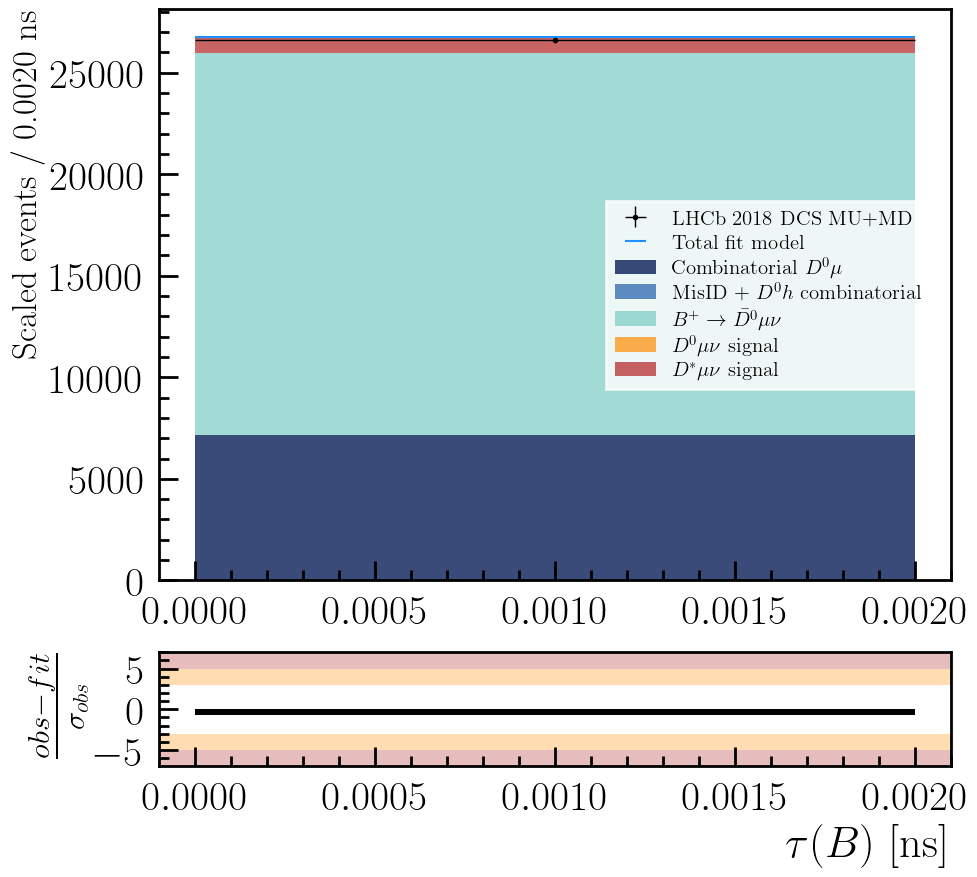

In [178]:
plot_fit_proj(proj_axis=1, plot_tot_fit_model=True, _units="ns", _xlabel=r"$\tau(B)$   [ns]" )

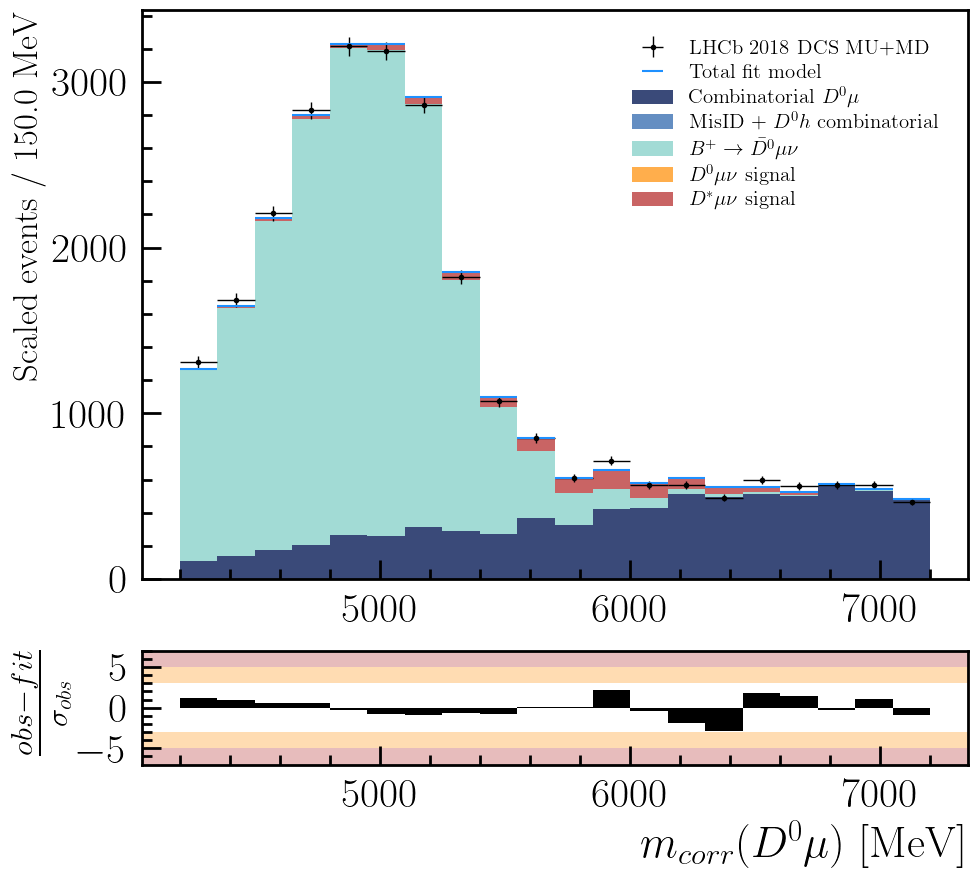

In [179]:
plot_fit_proj(proj_axis=0, plot_tot_fit_model=True, _units="MeV", _xlabel=r"$m_{corr}(D^{0}\mu)$   [MeV]")

In [95]:
#plot_fit_proj(proj_axis=1, plot_tot_fit_model=True, _units="MeV", _xlabel=r"$p_{\perp, B}(D^{0})$   [MeV]")
# plot_fit_proj(proj_axis=1, plot_tot_fit_model=True, _units="", _xlabel=r"$\log(IP\chi^{2}(D^{0})$")

In [96]:
# print fit results, removing the s_i precaling
dst_yield = (PRESCALED_FIT_RESULTS["dst_sig_y"] * muprime_vals["Dst_MC16"].sum() )/ norm_scale_factor
dz_yield = (PRESCALED_FIT_RESULTS["dz_sig_y"] * muprime_vals["D0_MC16"].sum() )/ norm_scale_factor

headers= [
    "Signal channel", "Fit resuts (physical events)"
]

table = [
    [f"Bc->D0MuNu", "{:,.3u}".format(dz_yield)],
    [f"Bc->D*MuNu", "{:,.3u}".format(dst_yield)],
]

print(tabulate(table, headers, tablefmt="fancy_grid"))

╒══════════════════╤════════════════════════════════╕
│ Signal channel   │ Fit resuts (physical events)   │
╞══════════════════╪════════════════════════════════╡
│ Bc->D0MuNu       │ 3,551+/-936                    │
├──────────────────┼────────────────────────────────┤
│ Bc->D*MuNu       │ 305+/-862                      │
╘══════════════════╧════════════════════════════════╛


In [97]:
# # NOTE: we are only concerned with the "real" yield scaled by s_i, as we are operating in s_i-scaled space
table = [
    ["Bu yield", s_i_scaled_bu_y_constraint.n, s_i_scaled_bu_y_constraint.n - s_i_scaled_bu_y_constraint.s, s_i_scaled_bu_y_constraint.n + s_i_scaled_bu_y_constraint.s, np.sum(scaled_ltime_bu_template)],
    ["misID yield", s_i_scaled_misid_y_constraint.n, s_i_scaled_misid_y_constraint.n - s_i_scaled_misid_y_constraint.s, s_i_scaled_misid_y_constraint.n + s_i_scaled_misid_y_constraint.s, np.sum(scaled_ltime_misid_template)]
]

# print(tabulate(table, headers, tablefmt="fancy_grid"))

NameError: name 'scaled_ltime_bu_template' is not defined

## Look at the projected MCORR in bins of a second fitvar

In [98]:
# tuple of all the dimensions
binned_shape = []
for axis in list( fit_config.values() ): binned_shape.append(axis["nbins"])
binned_shape=tuple(binned_shape)

# compile the scaled data tensor
flattened_data = (load_bh("DCS").view().value.flatten()) / s_i
flattened_data_err = (load_bh("DCS").view().variance**.5).flatten() / s_i

data = flattened_data.reshape( binned_shape )
error = flattened_data_err.reshape( binned_shape )

obs_mcorr_bin_centers = load_bh("DCS").axes[0].centers
obs_mcorr_bin_widths =  load_bh("DCS").axes[0].widths

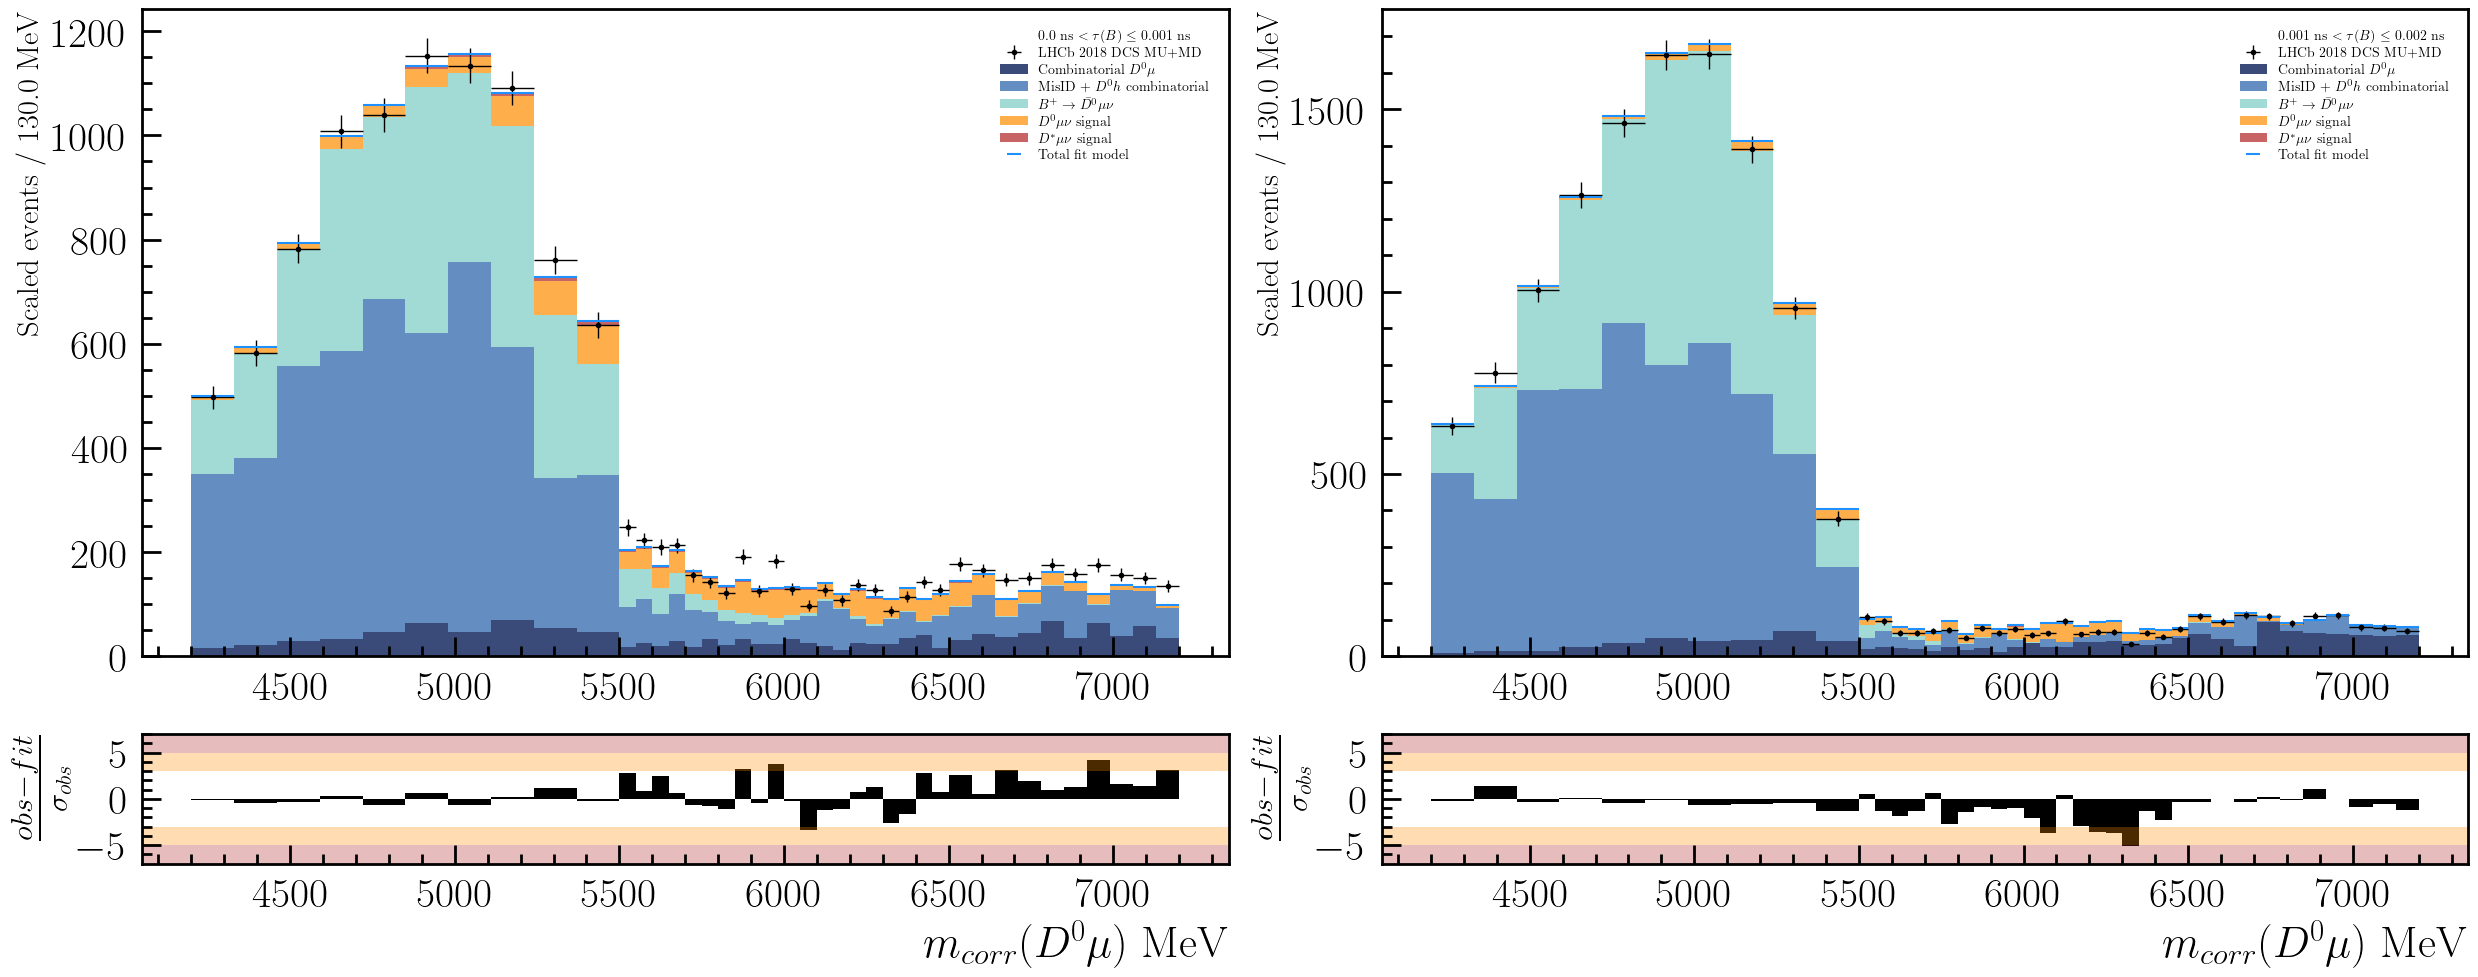

In [99]:
from matplotlib import pyplot
from matplotlib import gridspec

fig = pyplot.figure(figsize=(25, 10))

SPECTATO_VAR = "B_plus_FIT_LTIME"

gs0 = gridspec.GridSpec(1, fit_config[SPECTATO_VAR]["nbins"] )


for ltime_slice in range( fit_config[SPECTATO_VAR]["nbins"] ):
    gs = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=2, height_ratios=[5, 1], subplot_spec=gs0[ltime_slice])

    # plot the data first
    axs = plt.subplot(gs[0])

    mcorr_data_proj = data[:, ltime_slice]
    mcorr_data_proj_err = error[:, ltime_slice]

    
    low_tau_edge = (load_bh('DCS').axes[1].edges)[ltime_slice]
    high_tau_edge = (load_bh('DCS').axes[1].edges)[ltime_slice+1]
    axs.plot([], [], ' ', label=r"%s ns $< \tau(B) \leq$ %s ns"%(low_tau_edge, high_tau_edge) )

    axs.errorbar(x=obs_mcorr_bin_centers, y=mcorr_data_proj, yerr=mcorr_data_proj_err, xerr=obs_mcorr_bin_widths/2, fmt=".", color="black", label="LHCb 2018 DCS MU+MD ", elinewidth=1.)
    axs.set_ylim(bottom=0)

    # # combinatorial bkg
    mcorr_comb_bkg = (muprime_vals["COMB"] * PRESCALED_FIT_RESULTS["comb_y"].n * bb).reshape( binned_shape )[:, ltime_slice]
    axs.bar(x=obs_mcorr_bin_centers, height=mcorr_comb_bkg, bottom=[0], width=obs_mcorr_bin_widths, alpha=.8, label=r"Combinatorial $D^{0}\mu$",color="#081d58")

    # # misid background
    mcorr_misid_bkg = (misid_template.expected_data( [ PRESCALED_FIT_RESULTS["misid_y_constr"].n ], include_auxdata=False )*bb).reshape( binned_shape )[:, ltime_slice]
    axs.bar(x=obs_mcorr_bin_centers, height=mcorr_misid_bkg, bottom=mcorr_comb_bkg, width=obs_mcorr_bin_widths, alpha=.7, label=r"MisID + $D^{0}h$ combinatorial", color="#225ea8")

    # # B+ background
    mcorr_bu_bkg = (bu_template.expected_data( [ PRESCALED_FIT_RESULTS["bu_y_constr"].n ], include_auxdata=False )*bb).reshape( binned_shape )[:, ltime_slice]
    axs.bar(x=obs_mcorr_bin_centers, height=mcorr_bu_bkg, bottom=mcorr_comb_bkg+mcorr_misid_bkg, width=obs_mcorr_bin_widths, alpha=.7, label=r"$B^{+}\rightarrow \bar{D^0} \mu \nu$", color="#7bccc4")

    # # D0Mu signal
    mcorr_D0_sig = (muprime_vals["D0_MC16"] * PRESCALED_FIT_RESULTS["dz_sig_y"].n * bb).reshape( binned_shape )[:, ltime_slice]
    axs.bar(x=obs_mcorr_bin_centers, height=mcorr_D0_sig, bottom=mcorr_comb_bkg+mcorr_misid_bkg + mcorr_bu_bkg, width=obs_mcorr_bin_widths, alpha=.7, label=r"$D^{0}\mu\nu$ signal", color="darkorange")

    # # Dst signal
    mcorr_Dst_sig = (muprime_vals["Dst_MC16"] * PRESCALED_FIT_RESULTS["dst_sig_y"].n * bb).reshape( binned_shape )[:, ltime_slice]
    axs.bar(x=obs_mcorr_bin_centers, height=mcorr_Dst_sig, bottom=mcorr_comb_bkg+mcorr_misid_bkg + mcorr_bu_bkg + mcorr_D0_sig, width=obs_mcorr_bin_widths, alpha=.7, label=r"$D^{*}\mu\nu$ signal", color="firebrick")

    proj_fit = (pdf.expected_data(bestfit_pars, include_auxdata=False)).reshape( binned_shape )[:, ltime_slice]
    axs.errorbar(x=obs_mcorr_bin_centers, y=proj_fit, xerr=obs_mcorr_bin_widths/2, fmt=".", color="dodgerblue", label="Total fit model", elinewidth=1.5, markersize=.1)
    
    axs.legend(fontsize=10)
    axs.set_ylabel(f"Scaled events / {obs_mcorr_bin_widths[0]:.1f} MeV", fontsize=22)
    axs.minorticks_on()



    # pull plot (missing errors on pulls)
    ax1 = plt.subplot(gs[1])

    PULLS = (mcorr_data_proj - proj_fit) / mcorr_data_proj_err  
    ax1.bar(x=obs_mcorr_bin_centers, height=PULLS, width=obs_mcorr_bin_widths, alpha=1.,  color="black")

    ax1.set_ylim(-7, 7)
    ax1.minorticks_on()
    ax1.axhspan(5, 7, facecolor="firebrick", alpha=0.3)
    ax1.axhspan(-7, -5, facecolor="firebrick", alpha=0.3)
    ax1.axhspan(3, 5, facecolor="darkorange", alpha=0.3)
    ax1.axhspan(-5, -3, facecolor="darkorange", alpha=0.3)

    ax1.set_ylabel(r"$\frac{obs-fit}{\sigma_{obs}}$")
    ax1.set_xlabel(r"$m_{corr}(D^{0}\mu)$   MeV")

plt.savefig(f"./plots/fit/slices_redrange_fit_proj_nbins{fit_config[FITVARS[0]]['nbins']}_{fit_config[FITVARS[1]]['nbins']}.pdf")
plt.savefig(f"./plots/fit/slices_redrange_fit_proj_nbins{fit_config[FITVARS[0]]['nbins']}_{fit_config[FITVARS[1]]['nbins']}.png")